In [165]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
from datetime import datetime, timedelta

In [166]:
df_orai = pd.read_csv(r"C:\Users\pauli\Downloads\orai2014.csv")

failai=[]
for name in glob.glob(r'C:\Users\pauli\Downloads\orai\*.csv'):
    failai.append(name)
    
for i in failai:
    df_orai = pd.concat([df_orai, pd.read_csv(i)])

In [167]:
df_orai.head(2)

,obs_time_utc,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code
0,2014-01-01 00:00:00,-1.4,-5.1,2.9,NaN,175.0,88.0,1027.9,89.0,0.0,cloudy
1,2014-01-01 01:00:00,-1.1,-5.7,4.1,NaN,179.0,100.0,1027.8,89.0,0.0,cloudy


In [168]:
df_pacientas = pd.read_csv(r"C:\Users\pauli\Downloads\Pacientas.csv", low_memory=False)

In [169]:
df_pacientas.head(1)

,_type,_id,_revision,_page.next,vda_pk,paciento_id,atvejo_id,gyd_lap_pradzia,lytis,vda_gim_metai,savivaldybe,gyvenviete,gydymas,stacionaro_tipas,tlk_trauma,tlk_aplinkybe,tlk_veikla,tlk_vieta
0,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,fe5742d1-21bb-4897-9716-0ea67e22e005,f68b114b-36e7-4d6e-a072-919c64f98594,NaN,000002a37f16bf4,24cdba64a645d60,062bca343d25de9,2013-01-01,Vyras,1998-01-01,Kretingos r. sav.,Nežinoma,Ambulatorinis,NaN,S42.43,NaN,NaN,NaN


In [170]:
df_ligonine = pd.read_csv(r"C:\Users\pauli\Downloads\Ligonine.csv", low_memory=False)

In [171]:
df_ligonine.head(2)

,_type,_id,_revision,_page.next,vda_pk,istaiga,kodas,gyd_lap_pradzia,gyd_lap_pabaiga,tlk_trauma,gydymas,stacionaro_tipas
0,datasets/gov/hi/traumos_apsinuodijimai/Ligonine,70aca86e-b73d-4a36-9565-3cd2e9d6e8c4,e15c0952-bc76-424a-830f-d4cd74fdb815,NaN,0000027fb6075aa,"Vaikų ligoninė, viešosios įstaigos Vilniaus un...",302620298.0,2017-09-16T14:49:00,2017-09-19T11:45:00,S30.0,Ambulatorinis,NaN
1,datasets/gov/hi/traumos_apsinuodijimai/Ligonine,9dde0634-1636-45be-aecd-30f984dee7cc,8456aaff-25d2-4600-9a48-28dfa8892b9b,NaN,00000af4906151c,Viešoji įstaiga Plungės rajono savivaldybės li...,191135578.0,2016-10-07T09:37:00,2016-10-07T10:00:00,T15.0,Ambulatorinis,NaN


In [172]:
df_tlk = pd.read_excel(r"C:\Users\pauli\Downloads\1(9).xlsx")

In [173]:
df_tlk.head(1)

,TLK-10-AM Kodas,TLK-10-AM Kodo pavadinimas,Kodo lygis,Žvaigždutė,Apskritimas,Kryželis,Poskyrio eil. nr.,Poskyrio blokas,Poskyrio pavadinimas,Skyriaus nr.,Skyriaus blokas,Skyriaus pavadinimas,Data nuo,Data iki
0,A00,Cholera,1,0,0,0,1,(A00-A09),ŽARNYNO INFEKCINĖS LIGOS,1,(A00-B99),TAM TIKROS INFEKCINĖS IR PARAZITŲ SUKELIAMOS L...,1997-01-01,2100-01-01


In [174]:
df_menulis = pd.read_csv(r"C:\Users\pauli\Desktop\DataScienceNotebooks\Studentai\Paulius Vanagas\menulis.csv", low_memory=False)

In [175]:
df_menulis.head(1)

,data,menulis
0,2003-01-01,Delčia


In [176]:
df_pacientas.drop(columns=['_type', '_id', '_revision', '_page.next', 'vda_pk', 'atvejo_id',
                           'paciento_id'], inplace= True)

In [177]:
df_ligonine.drop(columns=['_type', '_id', '_revision', '_page.next', 'vda_pk', 'istaiga',
                           'kodas'], inplace= True)

In [178]:
df_ligonine['gyd_lap_pradzia'] = df_ligonine['gyd_lap_pradzia'].apply(lambda x: str(x).split('T')[0])

In [179]:
df_tlk['Poskyrio blokas'] = df_tlk['Poskyrio blokas'].apply(lambda x: x.replace('(', '').replace(')',''))
df_tlk['Skyriaus blokas'] = df_tlk['Skyriaus blokas'].apply(lambda x: x.replace('(', '').replace(')',''))
tlk_alko = df_tlk[df_tlk['TLK-10-AM Kodo pavadinimas'].str.contains('alkohol', na=False)]
tlk_alko = tlk_alko[tlk_alko['TLK-10-AM Kodas'].str.contains('F|X|Y|T', na=False)]
tlk_alko = tlk_alko[~tlk_alko['TLK-10-AM Kodas'].str.contains('F05|F04|Y57', na=False)]
tlk_trauma = df_tlk[df_tlk['Skyriaus pavadinimas'].str.contains('PADARINIAI', na=False)]

In [180]:
df_pacientas['alkoholis'] = df_pacientas['tlk_trauma'].apply(lambda x: 1 if x in tlk_alko['TLK-10-AM Kodas'].values else 0)
df_pacientas['trauma'] = df_pacientas['tlk_trauma'].apply(lambda x: 1 if x in tlk_trauma['TLK-10-AM Kodas'].values else 0)

df_ligonine['alkoholis'] = df_ligonine['tlk_trauma'].apply(lambda x: 1 if x in tlk_alko['TLK-10-AM Kodas'].values else 0)
df_ligonine['trauma'] = df_pacientas['tlk_trauma'].apply(lambda x: 1 if x in tlk_trauma['TLK-10-AM Kodas'].values else 0)

In [181]:
df_pacientas = df_pacientas.dropna(subset=['gyd_lap_pradzia', 'vda_gim_metai'])
df_pacientas['amzius'] =(
    df_pacientas['gyd_lap_pradzia'].str.split('-').str[0].astype(int) - 
    df_pacientas['vda_gim_metai'].str.split('-').str[0].astype(int)
)

In [182]:
df_ligonine['gyd_lap_pradzia'] = pd.to_datetime(df_ligonine['gyd_lap_pradzia'], errors='coerce')
df_ligonine['weekday'] = df_ligonine['gyd_lap_pradzia'].dt.day_name()
df_menulis['data'] = pd.to_datetime(df_menulis['data'], errors='coerce')
df_ligonine = df_ligonine.merge(df_menulis, how='left', left_on='gyd_lap_pradzia', right_on='data')

In [183]:
df_orai['obs_time_utc'] = pd.to_datetime(df_orai['obs_time_utc'], errors='coerce')
df_orai['data'] = df_orai['obs_time_utc'].dt.date
df_orai['data'] = pd.to_datetime(df_orai['data'], errors='coerce')

df_orai= df_orai.groupby('data')['air_temperature'].mean().reset_index()

df_ligonine = df_ligonine.merge(df_orai, how='left', left_on='gyd_lap_pradzia', right_on='data')

In [184]:
df_ligonine['air_temperature'] = df_ligonine['air_temperature'].round(0)

In [185]:
df_oru_daznis = df_ligonine.drop_duplicates(subset='gyd_lap_pradzia', keep='first')
df_oru_daznis= df_oru_daznis.groupby('air_temperature')['trauma'].count().reset_index()

In [221]:
df_data=df_ligonine.groupby('air_temperature')['trauma'].sum().reset_index()

df_data = df_data.sort_values('air_temperature')
df_data['trauma'] = df_data['trauma'] / df_oru_daznis['trauma']
df_data['air_temperature'] = df_data['air_temperature'].astype(int)

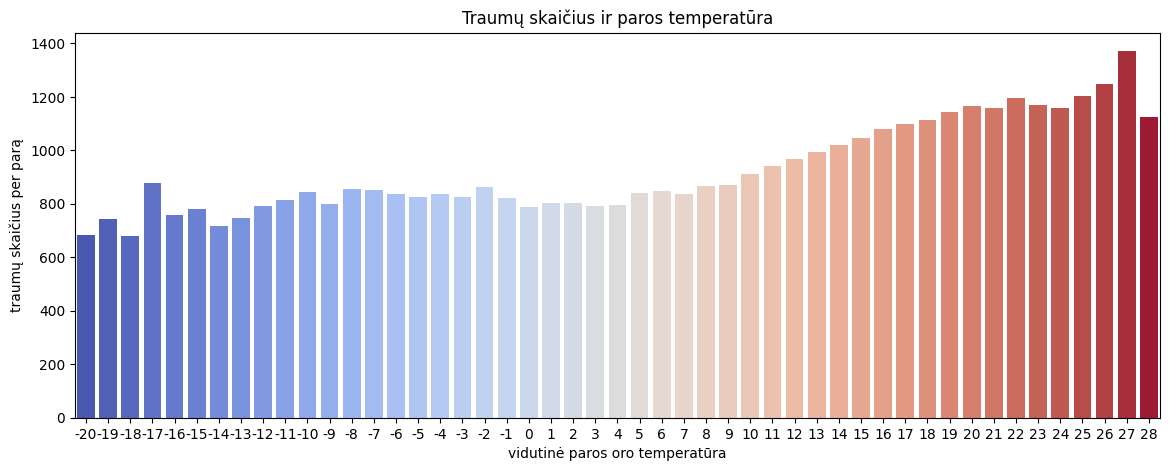

In [237]:
plt.figure(figsize=(14, 5))

norm = plt.Normalize(df_data['air_temperature'].min(), df_data['air_temperature'].max())
colors = [plt.cm.coolwarm(norm(val)) for val in df_data['air_temperature']]

sns.barplot(x='air_temperature', y='trauma', data=df_data, hue='air_temperature', palette=colors, dodge=False, legend=False)

plt.xlabel('vidutinė paros oro temperatūra')
plt.ylabel('traumų skaičius per parą') 
plt.title('Traumų skaičius ir paros temperatūra')
plt.show()

# sns.barplot(x='air_temperature', y='trauma', data=df_data, color='purple')
# plt.xlabel('Alkoholio vartojimo įpročiai') 
# plt.title('Alkoholio vartojimo įpročiai ir gyvenimo trukmė')
# plt.show()

In [197]:
df_data1=df_ligonine.groupby('weekday')['trauma'].sum().reset_index()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_data1['weekday'] = pd.Categorical(df_data1['weekday'], categories=weekday_order, ordered=True)
df_data1 = df_data1.sort_values('weekday')

In [198]:
df_data2=df_ligonine.groupby('weekday')['alkoholis'].sum().reset_index()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_data2['weekday'] = pd.Categorical(df_data2['weekday'], categories=weekday_order, ordered=True)
df_data2 = df_data2.sort_values('weekday')

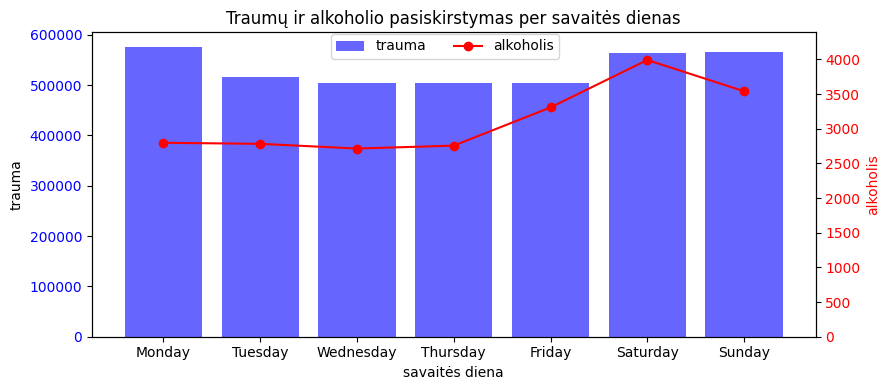

In [241]:
fig, ax1 = plt.subplots(figsize=(9, 4))

ax1.bar(df_data1['weekday'], df_data1['trauma'], color='blue', alpha=0.6, label='trauma')
ax1.set_xlabel('savaitės diena')
ax1.set_ylabel('trauma')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df_data2['weekday'], df_data2['alkoholis'], color='red', marker='o', label='alkoholis')
ax2.set_ylim(0, max(df_data2['alkoholis']) * 1.1)
ax2.set_ylabel('alkoholis', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.92), ncol=2)
plt.title('Traumų ir alkoholio pasiskirstymas per savaitės dienas')
plt.tight_layout()
plt.show()

In [238]:
df_data3=df_ligonine.groupby('menulis')['trauma'].sum().reset_index()

df_data4=df_ligonine.groupby('menulis')['alkoholis'].sum().reset_index()

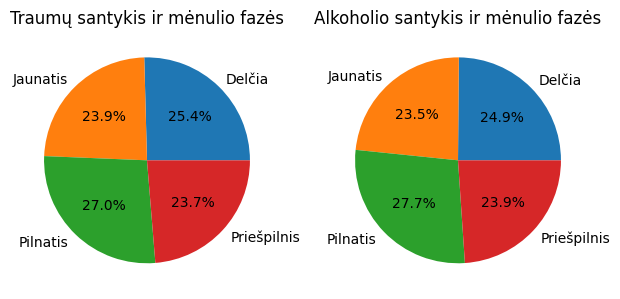

In [239]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(df_data3['trauma'], labels=df_data3['menulis'], autopct='%1.1f%%')
ax1.set_title('Traumų santykis ir mėnulio fazės')
ax2.pie(df_data4['alkoholis'], labels=df_data4['menulis'], autopct='%1.1f%%')
ax2.set_title('Alkoholio santykis ir mėnulio fazės')
plt.tight_layout()
plt.show()

In [242]:
df_pacientas.head(2)

,gyd_lap_pradzia,lytis,vda_gim_metai,savivaldybe,gyvenviete,gydymas,stacionaro_tipas,tlk_trauma,tlk_aplinkybe,tlk_veikla,tlk_vieta,alkoholis,trauma,amzius
0,2013-01-01,Vyras,1998-01-01,Kretingos r. sav.,Nežinoma,Ambulatorinis,NaN,S42.43,NaN,NaN,NaN,0,1,15
1,2022-08-01,Vyras,1973-01-01,Vilniaus r. sav.,Kaimas,Ambulatorinis,NaN,S13.6,W22,U54.08,Y92.80,0,1,49


In [270]:
df_data5= df_pacientas.groupby(['amzius', 'lytis'])['trauma'].sum().reset_index()
df_data5 = df_data5[df_data5['lytis'] != 'Nežinoma']

df_data6= df_pacientas.groupby(['amzius', 'lytis'])['alkoholis'].sum().reset_index()
df_data6 = df_data6[df_data6['lytis'] != 'Nežinoma']

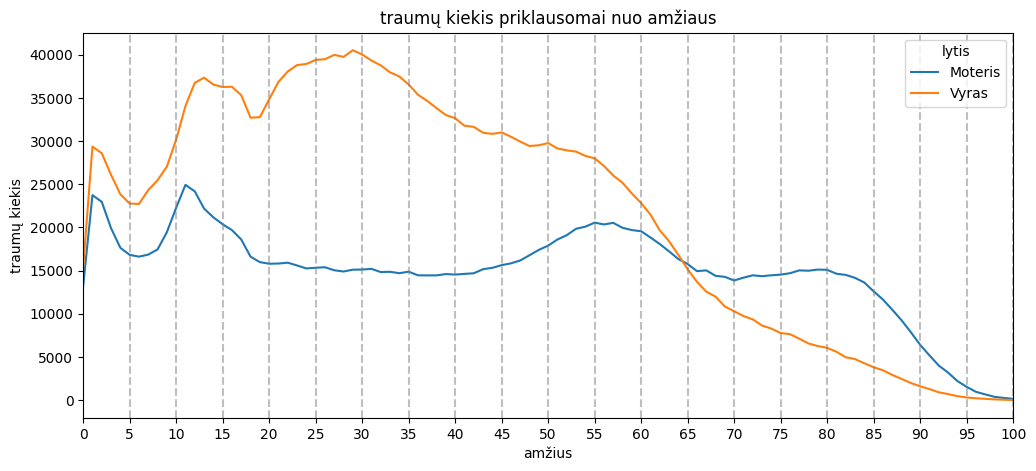

In [266]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='amzius', y='trauma', data=df_data5, hue ='lytis')
plt.xlabel('amžius')
plt.ylabel('traumų kiekis')
plt.title('traumų kiekis priklausomai nuo amžiaus')
plt.xlim(1, 100)
plt.xticks(np.arange(0, 101, 5))
for x in range(5, 101, 5):
    plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)
plt.show()

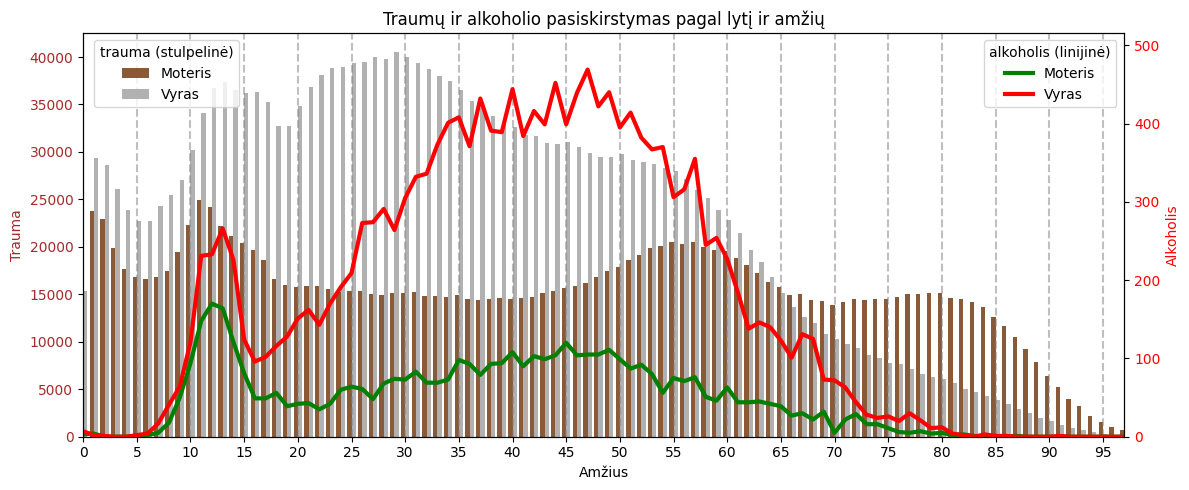

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 5))

sns.barplot(x='amzius', y='trauma', hue='lytis', palette={'Vyras': 'darkgray', 'Moteris': 'saddlebrown'}, data=df_data5, ax=ax1, alpha=0.9)

ax1.set_xlabel('Amžius')
ax1.set_ylabel('Trauma', color = 'brown')
ax1.tick_params(axis='y', labelcolor='brown')

ax2 = ax1.twinx()
sns.lineplot(x='amzius', y='alkoholis', hue='lytis', data=df_data6, ax=ax2, palette={'Vyras': 'red', 'Moteris': 'green'}, linewidth=3)

ax2.set_ylim(0, max(df_data6['alkoholis']) * 1.1)
ax2.set_ylabel('Alkoholis', color = 'red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left', bbox_to_anchor=(0.004, 0.999), title ='trauma (stulpelinė)')
ax2.legend(loc='upper right', bbox_to_anchor=(0.999, 0.999), title = 'alkoholis (linijinė)')

plt.xlim(3, 100)
plt.xticks(np.arange(3, 101, 5))

for x in range(3, 101, 5):
    ax1.axvline(x=x, color='gray', linestyle='--', alpha=0.5)

plt.title('Traumų ir alkoholio pasiskirstymas pagal lytį ir amžių')

plt.tight_layout()

plt.show()